In [1]:
pip install tensorflow tensorflow_hub scikit-learn seaborn plotly nbformat

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

In [2]:
# Load the Universal Sentence Encoder's TF Hub module
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [20]:
file = '/Users/naima.abdirahman/Downloads/metadata (1).csv'

In [21]:
import pandas as pd
data=pd.read_csv(file)
content=pd.DataFrame(data)
content.head()
content=content[content['hashtags'].notna()]
content=content[content['video_locationcreated']=='US']

/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_20565/2769557358.py:2: DtypeWarning:

Columns (0,2,5,6,7,8,10,11,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.



In [40]:

content.head()

video_id      video_timestamp video_duration  \
4   7310000000000000000.0  2023-12-11T20:17:46           62.0   
5   7310000000000000000.0  2023-11-27T16:12:30            6.0   
8   7340000000000000000.0  2024-02-15T18:26:50          167.0   
12  7340000000000000000.0  2024-03-02T14:01:59           14.0   
15  7340000000000000000.0  2024-03-02T08:36:00            0.0   

   video_locationcreated                                    suggested_words  \
4                     US                                                NaN   
5                     US  gail lewis walmart, guy slipping in ice for 15...   
8                     US  Emiliekiser, Emilie, avery and emilie tea, Nai...   
12                    US  Emiliekiser, Emilie, couple, ootd, Couple Outf...   
15                    US  Zodiac Signs, astrology, taurus, Sagittarius, ...   

   video_diggcount video_sharecount video_commentcount video_playcount  \
4          88700.0            295.0               40.0        973800.0   
5        2000000.0         108700.0            19800.0      28900000.0   
8         213700.0            121.0              520.0       1400000.0   
12        269500.0            251.0              579.0       1900000.0   
15         52800.0            764.0              225.0        534700.0   

                                    video_description  ...  \
4   Still unsure what to name this series lol #nyc...  ...   
5   He kept going 😂 (via @Wendy Woods 💕) #snow #cold   ...   
8   I love being delusional🤪🫶🏻🤦🏼‍♀️🤔 SEE YOU GUYS ...  ...   
12  PARADISE🌴✨💗🫶🏻 @Brady #couplesootd #outfitideas...  ...   
15  #zodiac #aries #taurus #gemini #cancer #leo #v...  ...   

       author_username       author_name author_followercount  \
4          kaitlyneats    Kaitlyn Lavery                  NaN   
5                 espn              ESPN                  NaN   
8          emiliekiser            Emilie                  NaN   
12         emiliekiser            Emilie                  NaN   
15  collectiveworld.tc  Collective World                  NaN   

   author_followingcount author_heartcount author_videocount author_diggcount  \
4                    NaN               NaN               NaN              NaN   
5                    NaN               NaN               NaN              NaN   
8                    NaN               NaN               NaN              NaN   
12                   NaN               NaN               NaN              NaN   
15                   NaN               NaN               NaN              NaN   

   author_verified                                           hashtags  \
4            False           nycrestaurants, nycreservations, nycfood   
5             True                                         snow, cold   
8            False  dayinmylife, minivlog, weekdayvlog, nailday, t...   
12           False  couplesootd, outfitideas, ootd, viral, trendin...   
15           False  zodiac, aries, taurus, gemini, cancer, leo, vi...   

    data_user  
4   user_0001  
5   user_0001  
8   user_0001  
12  user_0001  
15  user_0001  

[5 rows x 22 columns]

In [5]:
hashtags=content['hashtags'].tolist()

In [6]:
filtered_hashtags = []

# Words to remove from hashtags
words_to_remove = ['fyp', 'FYP', 'Fyp', 'foryou', 'FORYOU', 'tiktok', 'viral', 'trending', 'TikTok']

# Iterate over each hashtag
for hashtag in hashtags:
    # Check if any of the words to remove are present in the hashtag
    if not any(word in hashtag.lower() for word in words_to_remove):
        # If none of the words to remove are present, add the hashtag to the filtered list
        filtered_hashtags.append(hashtag)

# Now, filtered_hashtags contains the hashtags without the specified words


In [7]:
#get word embedings 
Hashembed=embed(filtered_hashtags)

In [10]:
embedings[0]

<tf.Tensor: shape=(512,), dtype=float32, numpy=
array([ 0.0133257 , -0.05159645,  0.02911617,  0.01373069,  0.079077  ,
        0.00649869,  0.03447568, -0.03724956, -0.10811315, -0.02763745,
        0.01614633, -0.00518586,  0.01273583, -0.02106546, -0.01911943,
        0.01265193, -0.01472009, -0.06863036, -0.00928209, -0.05917082,
        0.04409162,  0.04494167, -0.08284115, -0.03132468,  0.01025788,
        0.06376486, -0.05479564,  0.03494705, -0.00149713,  0.05984623,
        0.04804416,  0.05623557, -0.03357942, -0.01255152,  0.04169806,
        0.01924621, -0.02957628,  0.00770386, -0.08440217,  0.03859921,
       -0.05789883, -0.08651099,  0.03747443, -0.00339361,  0.02655033,
       -0.00916618, -0.0077058 ,  0.00528365, -0.02316101,  0.02974745,
       -0.03220056,  0.06479472, -0.00865576, -0.09427276, -0.06686535,
        0.00882218,  0.00339693, -0.01269967,  0.06824811, -0.0088964 ,
       -0.02165724, -0.04860992, -0.08826284, -0.07694392, -0.04154342,
        0.074805

In [8]:
from sklearn.cluster import KMeans

In [9]:
#perform clustering with fixed K value
k=4
kmeans=KMeans(n_clusters=k, random_state=42)
clusters=kmeans.fit_predict(Hashembed)

/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
#print out the composition of each cluste
for i in range(k):
    print(f"Cluster {i}:")
    cluster_words = [filtered_hashtags[j] for j in range(len(filtered_hashtags)) if clusters[j] == i]
    print(cluster_words)

Cluster 0:
['snow, cold', 'zodiac, aries, taurus, gemini, cancer, leo, virgo, libra, scorpio, sagittarius, capricorn, aquarius, pisces, astrology, relationships, firesigns, earthsigns, airsigns, watersigns', 'nyc, newyork, city, wv', 'dualipa, brits, britawards2024', '2024, Recap, Rap', 'TechTok, Broadway, WaterForElephants', 'embroidery, strawberries, diy', 'astrology, watersigns, earthsigns, airsigns, firesigns, dakotajohnson, libra, mecore, core', 'xybca, kj2tuff, mydc, jerry2v, rue, trio', 'maneskin, damianodavid, dovecameron, disneyland', 'allthatwork, babybel, cheese, candy', 'anyataylorjoy, emma', 'dating, breakup, breakuphumor, alishamarie', 'doctors, scientists, medical, shitpost, meme, butiamserious, resetme', 'psych, podcast, psychology, lobotomy, howarddully, greenscreen', 'duet, medicine, lobotomy, medicalhistory, doctor, mentalhealth, interesting', 'funfacts, psychologyfacts, science, medicine, cool, anatomy, scienceiscool', 'sahm, ditl, homemaker, homemaking, makingpaper

In [47]:
def elbowMethod(embedings, maxK):
    """
    Implements the Elbow method for finding most optimal k.
    It keeps track of a measure named "inertia" for each cluster.
    """
    sumSquaredDistances = []
    kValues = list(range(1, maxK))
    for k in kValues:
        km = KMeans(n_clusters=k, random_state=42)
        km = km.fit(embedings)
        sumSquaredDistances.append(km.inertia_)
    
    # plot the line to identify the elbow
    plt.plot(kValues, sumSquaredDistances, 'ro-')
    plt.xlabel('k')
    plt.xticks(kValues)
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k for Hashtags')
    save_path = '/Users/naima.abdirahman/Desktop/CS315/CS315-Project3-Group2/elbow_plot2.png'

    # Save the plot to the specified path
    plt.savefig(save_path)

    # Show the plot
    plt.show()
    

In [27]:
import matplotlib.pyplot as plt

/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/naima.abdirahman/anaconda3/li

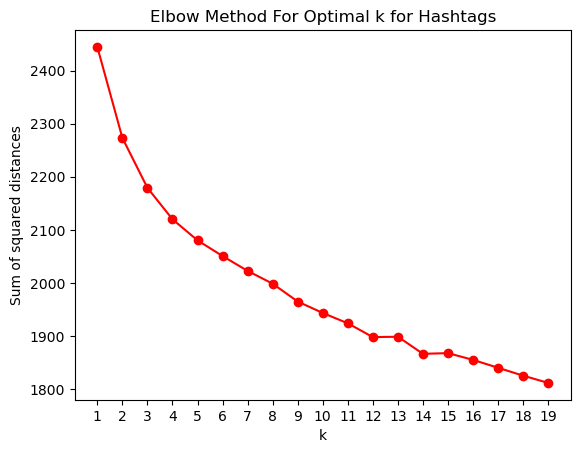

In [48]:
elbowMethod(Hashembed, 20)

In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(n_components=2, random_state=42)  
tsne_results = tsne.fit_transform(Hashembed)

In [13]:

df = pd.DataFrame(tsne_results, columns=['tsne_1', 'tsne_2'])
df['hashtags'] = filtered_hashtags
df['cluster'] = clusters # the cluster indices where each news hashtags belong
df.head()


tsne_1     tsne_2                                           hashtags  \
0  10.819319 -49.181362           nycrestaurants, nycreservations, nycfood   
1  29.109720  62.504314                                         snow, cold   
2  36.546135  90.943909  zodiac, aries, taurus, gemini, cancer, leo, vi...   
3 -26.588533  51.175533                             nyc, newyork, city, wv   
4  27.868206 -89.473366                              DovePartner, DoveLove   

   cluster  
0        2  
1        0  
2        0  
3        0  
4        3

In [14]:
import plotly.express as px


In [15]:
# Create the scatter plot
fig = px.scatter(df, x='tsne_1', y='tsne_2', text='hashtags', color="cluster", color_continuous_scale="BlueRed")

# Format what to show next to the markers
fig.update_traces(textposition='top center', 
                  mode='markers+text', 
                  textfont=dict(size=6))

fig.update_layout(title='Embeddings of Hashtags of videos for 10 users', width=1000, height=800)
fig.show()

In [16]:

# Define the fraction of data to visualize (e.g., 10%)
fraction_to_visualize = 0.05

# Get the number of rows in your DataFrame
total_rows = len(df)

# Calculate the number of rows to sample
num_rows_to_sample = int(total_rows * fraction_to_visualize)

# If you want to ensure that you don't sample more rows than you have, 
# you can set a maximum limit.
# For example, if you want to visualize a maximum of 1000 rows:
# num_rows_to_sample = min(num_rows_to_sample, 1000)

# Randomly sample rows from the DataFrame
sampled_df = df.sample(n=num_rows_to_sample, random_state=42) # Set seed 


fig = px.scatter(sampled_df, x='tsne_1', y='tsne_2', text='hashtags', color="cluster", color_continuous_scale="BlueRed")

# Format what to show next to the markers
fig.update_traces(textposition='top center', 
                  mode='markers+text', 
                  textfont=dict(size=6))

fig.update_layout(title='Embeddings of TikTokh hashtags for 10 users', width=1000, height=1000)
fig.show()


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud

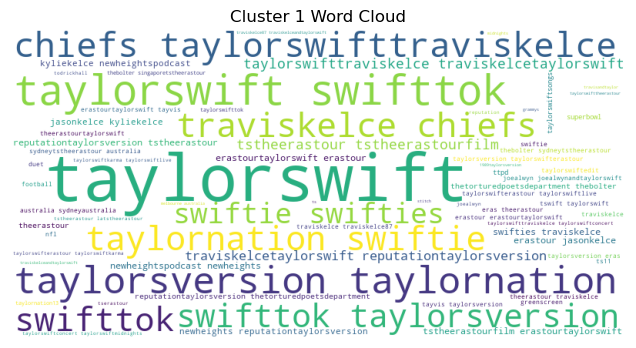

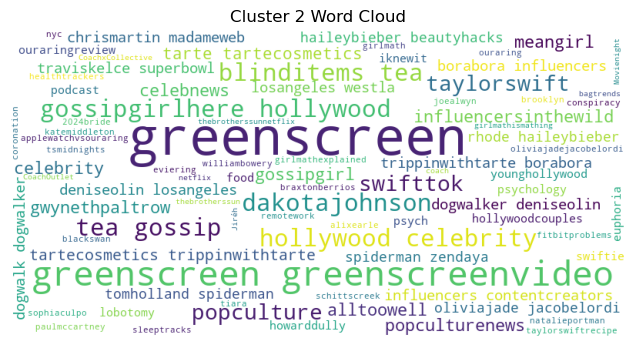

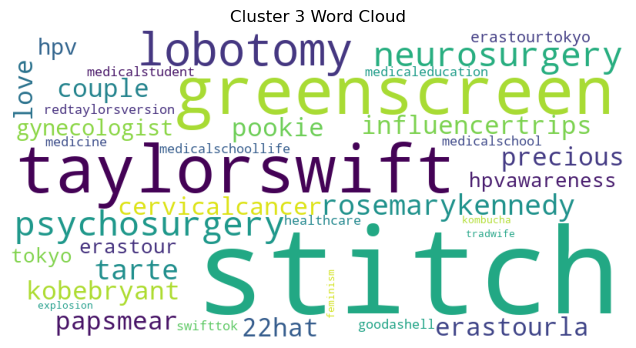

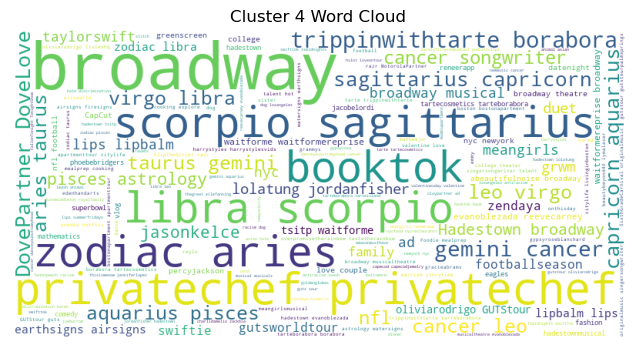

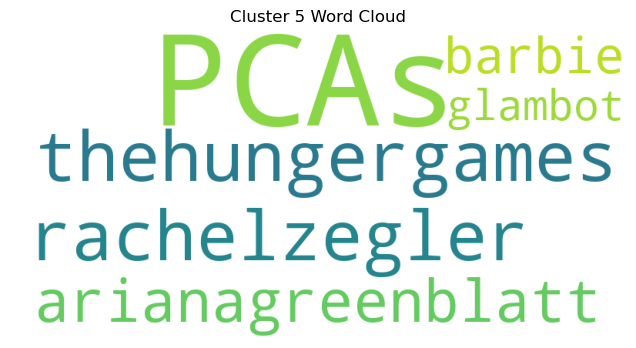

In [62]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the path to your CS315 folder on your desktop
cs315_folder_path = "/Users/naima.abdirahman/Desktop/CS315/"

#see whats in each cluster 
# Plot word clouds for each cluster from the hashtags 
for cluster_num in range(k):
    cluster_words = ""
    for i, label in enumerate(kmeans.labels_):
        if label == cluster_num:
            cluster_words += filtered_hashtags[i] + " "
    wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=5).generate(cluster_words)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud)
    plt.title(f"Cluster {cluster_num + 1} Word Cloud")
    plt.axis("off")

    # Save the plot to the CS315 folder
    plt.savefig(os.path.join(cs315_folder_path, f"cluster_{cluster_num + 1}_wordcloud.png"))

    plt.show()


In [ ]:
df.head()

In [31]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 2.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [24]:

# Perform PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_result = pca.fit_transform(Hashembed)


In [25]:
# Perform T-SNE on the PCA-transformed data
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_result)


In [27]:
# Visualize T-SNE result
df_tsne = pd.DataFrame(tsne_result, columns=['tsne_1', 'tsne_2'])
df_tsne['hashtags'] = filtered_hashtags


In [40]:
# Scatter plot using Plotly Express
fig = px.scatter(df_tsne, x='tsne_1', y='tsne_2', text='hashtags', title='T-SNE Visualization with PCA')
fig.update_traces(textposition='top center', mode='markers+text', textfont=dict(size=6))
fig.show()





/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Perform KMeans clustering on PCA-transformed data
k = 5  # Number of clusters: found by elbowmethod
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(pca_result)

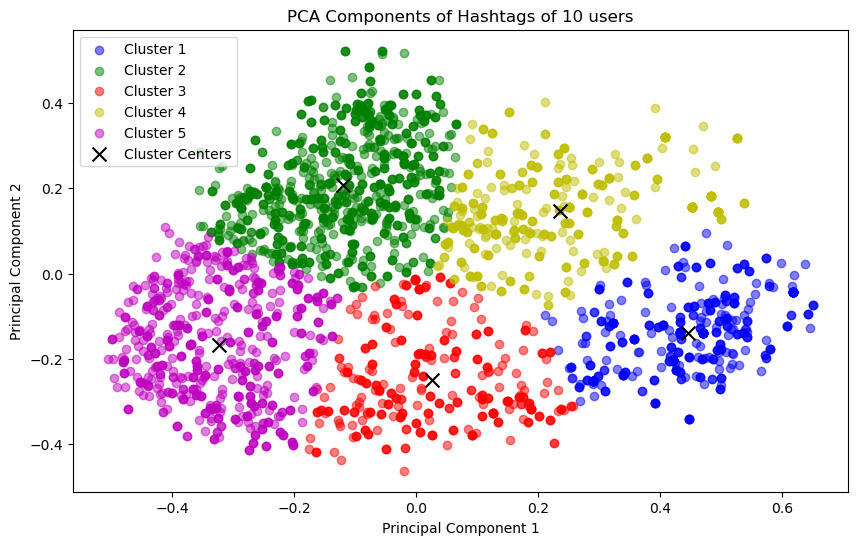

In [49]:


# Define colors for each cluster
colors = ['b', 'g', 'r', 'y', 'm']

# Plot PCA components
plt.figure(figsize=(10, 6))
for i in range(len(colors)):
    plt.scatter(pca_result[clusters == i, 0], pca_result[clusters == i, 1], color=colors[i], alpha=0.5, label=f'Cluster {i+1}')

# cluster centers X:
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, c='black', label='Cluster Centers')

plt.title('PCA Components of Hashtags of 10 users')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# legend here?
plt.legend()

# Save the plot to the CS315 folder
plt.savefig("/Users/naima.abdirahman/Desktop/cs315/CS315-Project3-Group2/PCA.png")
plt.show()


In [43]:

#empty list to store standard deviations for each cluster
cluster_std = []

# Iterate over each cluster
for cluster_num in range(k):
    # Select data points belonging to the current cluster
    cluster_data = pca_result[clusters == cluster_num]
    # Calculate the standard deviation of the cluster's data points
    std = np.std(cluster_data, axis=0)
    # Append the standard deviation to the list
    cluster_std.append(std)

# Convert the list to a numpy array for easier manipulation
cluster_std = np.array(cluster_std)

# Print the standard deviation for each cluster
for cluster_num, std in enumerate(cluster_std):
    print(f"Cluster {cluster_num + 1} Standard Deviation:")
    print(std)


Cluster 1 Standard Deviation:
[0.1012627  0.08622323]
Cluster 2 Standard Deviation:
[0.09765298 0.11867809]
Cluster 3 Standard Deviation:
[0.1076596  0.10651137]
Cluster 4 Standard Deviation:
[0.13452091 0.09619533]
Cluster 5 Standard Deviation:
[0.08985309 0.1257843 ]
